In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_train.csv
/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_submission.csv
/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_test.csv


In [2]:
train_csv = pd.read_csv('/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_train.csv')
#
train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


In [3]:
# combine Country region and Province state: and avoide NAN values 
train_csv['combine state'] = train_csv['Country/Region'].fillna('') + str(': ') +train_csv['Province/State'].fillna('')

train_csv.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,combine state
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,US: California
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0,US: California
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0,US: California
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0,US: California
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0,US: California


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
Id                57 non-null int64
Province/State    57 non-null object
Country/Region    57 non-null object
Lat               57 non-null float64
Long              57 non-null float64
Date              57 non-null object
ConfirmedCases    57 non-null float64
Fatalities        57 non-null float64
combine state     57 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 4.1+ KB


In [5]:
train_csv.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000
mean,29.000000,3.611620e+01,-1.196816e+02,63.087719,0.982456
std,16.598193,1.433718e-14,1.003602e-13,169.668614,2.715637
min,1.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
25%,15.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
50%,29.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
75%,43.000000,3.611620e+01,-1.196816e+02,0.000000,0.000000
max,57.000000,3.611620e+01,-1.196816e+02,751.000000,13.000000


# EDA: using ProfilerReport

In [6]:
from pandas_profiling import ProfileReport
train_profile = ProfileReport(train_csv, title='Pandas Profiling Report', html={'style':{'full_width':True}})
train_profile

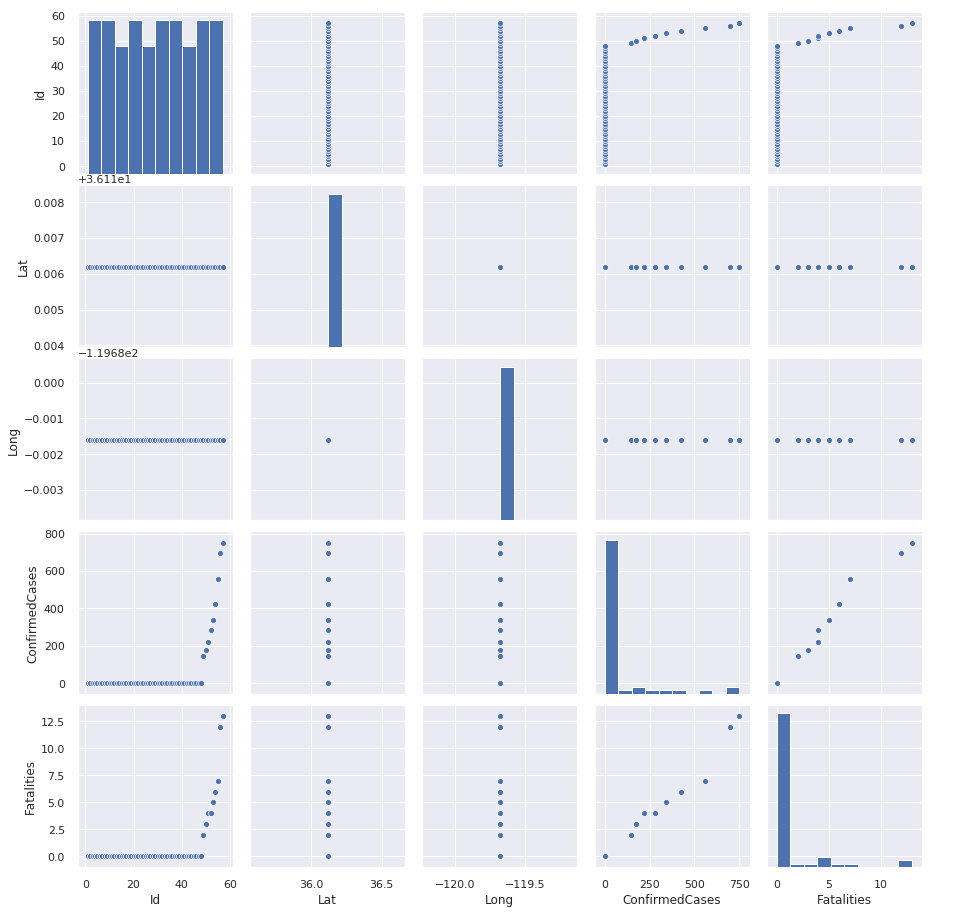

In [7]:
# CREATE SCATTER PLOT 
sns.set()
sns.pairplot(train_csv)

In [8]:
# we dont need the whole dataframe to analyze
train_csv = train_csv.set_index('Date')
col = ['combine state',
       'ConfirmedCases', 'Fatalities']
df = train_csv[col]
df.head()

,combine state,ConfirmedCases,Fatalities
Date,,,
2020-01-22,US: California,0.0,0.0
2020-01-23,US: California,0.0,0.0
2020-01-24,US: California,0.0,0.0
2020-01-25,US: California,0.0,0.0
2020-01-26,US: California,0.0,0.0


# plot: Fatalities and Confirmed cases vs Time
#### remove all the nan values on the basis of confirmed cases: After 3rd March 2020 

In [9]:

df1 = df[df['ConfirmedCases']>0.0]
df1

,combine state,ConfirmedCases,Fatalities
Date,,,
2020-03-10,US: California,144.0,2.0
2020-03-11,US: California,177.0,3.0
2020-03-12,US: California,221.0,4.0
2020-03-13,US: California,282.0,4.0
2020-03-14,US: California,340.0,5.0
2020-03-15,US: California,426.0,6.0
2020-03-16,US: California,557.0,7.0
2020-03-17,US: California,698.0,12.0
2020-03-18,US: California,751.0,13.0


# Total number of confirmed cases and deaths in USA: California

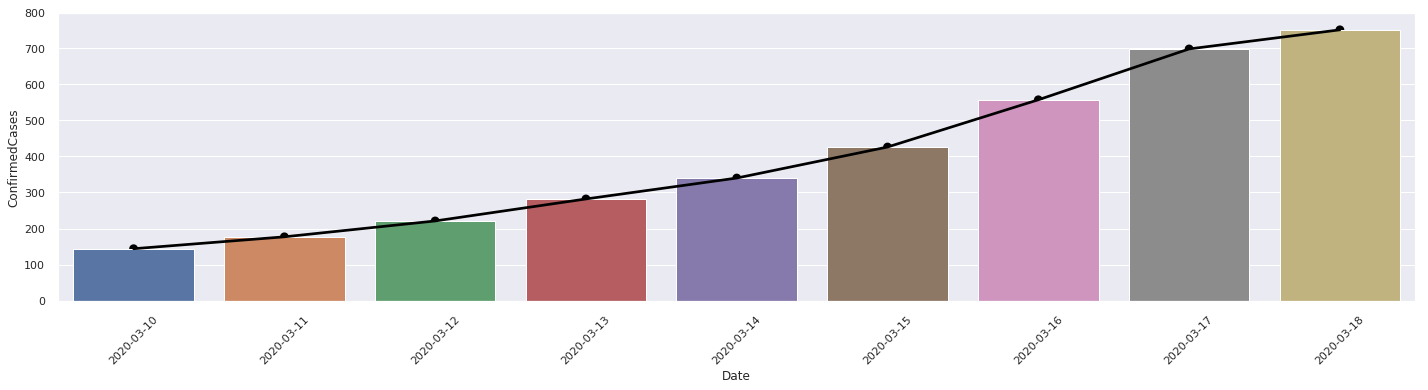

In [10]:

plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['ConfirmedCases'])
sns.pointplot(x=df1.index,y=df1['ConfirmedCases'],color='Black')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

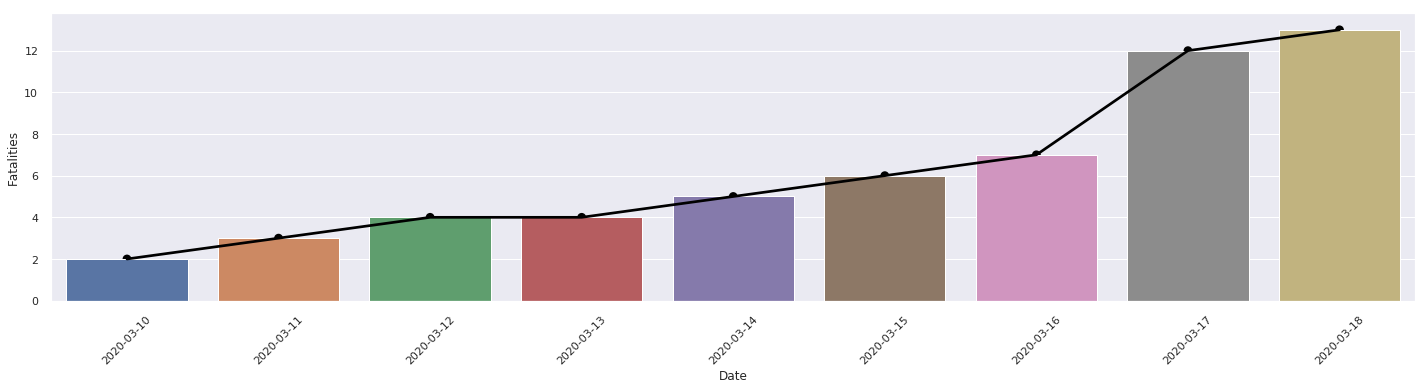

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Fatalities'])
sns.pointplot(x=df1.index,y=df1['Fatalities'],color='Black')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

# Model 

### Let us prepare the data for forcasting 

In [12]:
train_csv = pd.read_csv('/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_train.csv')
train_csv = train_csv[train_csv['ConfirmedCases']>0.0]
train_csv.columns
col = ['Id', 'Lat', 'Long','ConfirmedCases', 'Fatalities','Date']
df_final = train_csv[col]
df_final = df_final.reset_index()
df_final

,index,Id,Lat,Long,ConfirmedCases,Fatalities,Date
0,48,49,36.1162,-119.6816,144.0,2.0,2020-03-10
1,49,50,36.1162,-119.6816,177.0,3.0,2020-03-11
2,50,51,36.1162,-119.6816,221.0,4.0,2020-03-12
3,51,52,36.1162,-119.6816,282.0,4.0,2020-03-13
4,52,53,36.1162,-119.6816,340.0,5.0,2020-03-14
5,53,54,36.1162,-119.6816,426.0,6.0,2020-03-15
6,54,55,36.1162,-119.6816,557.0,7.0,2020-03-16
7,55,56,36.1162,-119.6816,698.0,12.0,2020-03-17
8,56,57,36.1162,-119.6816,751.0,13.0,2020-03-18


In [13]:
#df_final["Date"] = pd.to_datetime(df_final["Date"]).dt.strftime("%Y%m%d")
df_final['Date'] = pd.to_numeric(df_final.Date.str.replace('-',''))
print( df_final )

   index  Id      Lat      Long  ConfirmedCases  Fatalities      Date
0     48  49  36.1162 -119.6816           144.0         2.0  20200310
1     49  50  36.1162 -119.6816           177.0         3.0  20200311
2     50  51  36.1162 -119.6816           221.0         4.0  20200312
3     51  52  36.1162 -119.6816           282.0         4.0  20200313
4     52  53  36.1162 -119.6816           340.0         5.0  20200314
5     53  54  36.1162 -119.6816           426.0         6.0  20200315
6     54  55  36.1162 -119.6816           557.0         7.0  20200316
7     55  56  36.1162 -119.6816           698.0        12.0  20200317
8     56  57  36.1162 -119.6816           751.0        13.0  20200318


In [14]:
# select the columns and devide the dataset into train and development data 
col_X = ['Date']
col_Ycon = ['ConfirmedCases']
col_Yfat = ['Fatalities']
trainX = df_final[col_X].iloc[:,:]
trainYcon = df_final[col_Ycon].iloc[:,:]
trainF= df_final[col_Yfat].iloc[:,:]


# Polynomial Regression model for Confirmed cases 

In [15]:
# function for all the polynomial Regression
import numpy
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
def polyfit(x, y, degree):
        import numpy
        results = {}

        coeffs = numpy.polyfit(x, y, degree)

         # Polynomial Coefficients
        results['polynomial'] = coeffs.tolist()

        # r-squared
        p = numpy.poly1d(coeffs)
        # fit values, and mean
        yhat = p(x)                         # or [p(z) for z in x]
        ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
        ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        results['R square:'] = ssreg / sstot
        print('equation :')
        print( p)
        return p, results

In [16]:
trainYcon['ConfirmedCases'].values
trainX['Date'].values

array([20200310, 20200311, 20200312, 20200313, 20200314, 20200315,
       20200316, 20200317, 20200318])

In [17]:
# Train the model on training data
p, results = polyfit(trainX['Date'].values,trainYcon['ConfirmedCases'].values, degree = 8)

equation :
          8             7            6             5             4
5.91e-45 x + 2.976e-38 x - 6.87e-31 x - 2.957e-23 x - 7.029e-16 x
              3          2
 - 1.207e-08 x - 0.1148 x + 2.033e+06 x + 1.637e+14


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


## for training set (confirmed cases) 

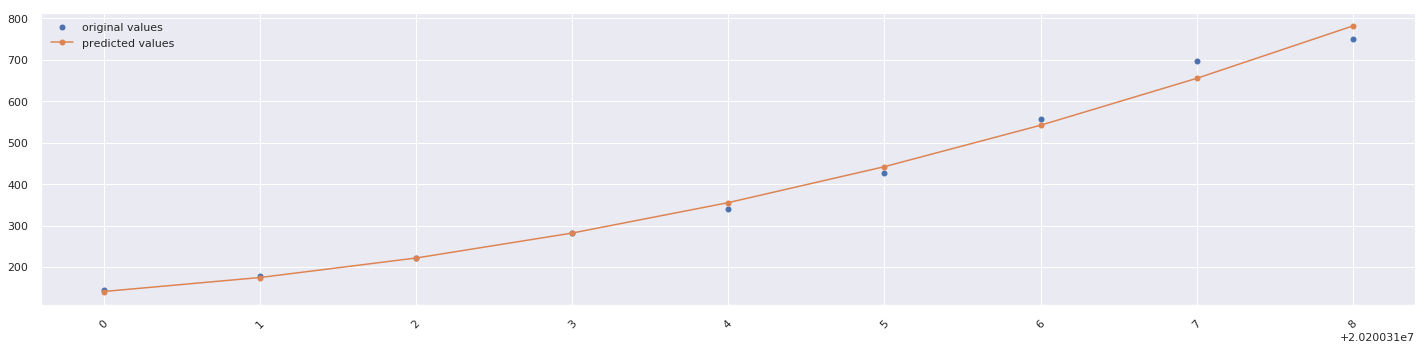

In [18]:
plt.figure(figsize=(20,5))
plt.plot(trainX['Date'].values,trainYcon['ConfirmedCases'].values, 'o', label='original values ')# original values 
plt.plot(trainX['Date'].values,p(trainX['Date']), '-o', label='predicted values')# predicted values 
plt.legend()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

## for testing set (confirmed cases)

In [19]:
# Testing Dataset 
testing = pd.read_csv('/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_test.csv')
#
testing['Date'] = pd.to_numeric(testing.Date.str.replace('-',''))
testing.head() 

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,California,US,36.1162,-119.6816,20200312
1,2,California,US,36.1162,-119.6816,20200313
2,3,California,US,36.1162,-119.6816,20200314
3,4,California,US,36.1162,-119.6816,20200315
4,5,California,US,36.1162,-119.6816,20200316


In [20]:

testing['confirmed cases'] = p(testing['Date'])# predicted values 
testing.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date,confirmed cases
0,1,California,US,36.1162,-119.6816,20200312,221.50000
1,2,California,US,36.1162,-119.6816,20200313,281.78125
2,3,California,US,36.1162,-119.6816,20200314,355.25000
3,4,California,US,36.1162,-119.6816,20200315,442.03125
4,5,California,US,36.1162,-119.6816,20200316,542.03125


# polynomial regression for (Fatalities)

In [21]:
# Train the model on training data
p, results = polyfit(trainX['Date'].values,trainF['Fatalities'].values, degree = 8)

equation :
           8             7             6             5             4
1.611e-46 x + 8.111e-40 x - 1.873e-32 x - 8.061e-25 x - 1.916e-17 x
              3            2
 - 3.289e-10 x - 0.003128 x + 5.541e+04 x + 4.463e+12


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


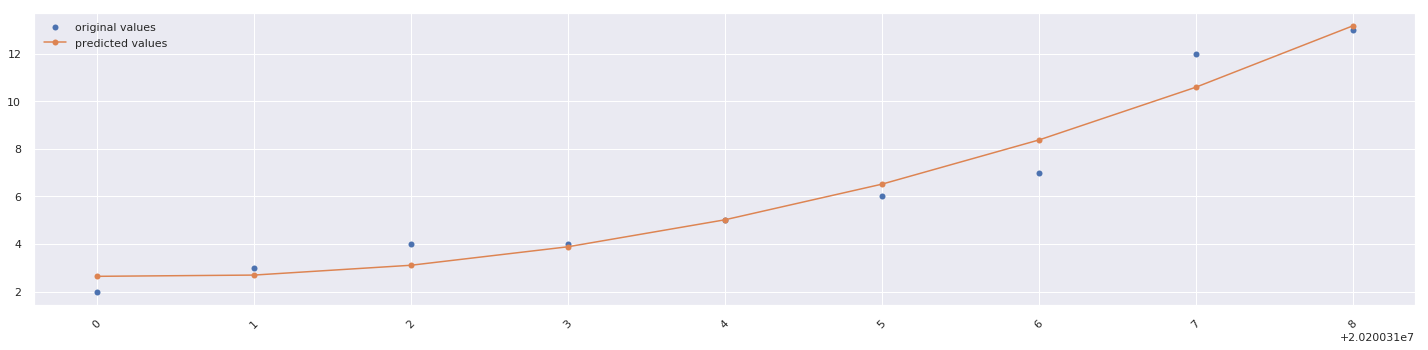

In [22]:
plt.figure(figsize=(20,5))
plt.plot(trainX['Date'].values,trainF['Fatalities'].values, 'o', label='original values ')# original values 
plt.plot(trainX['Date'].values,p(trainX['Date']), '-o', label='predicted values')# predicted values 
plt.legend()
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [23]:
testing['Fatalities'] = p(testing['Date'])# predicted values 
testing['Fatalities'] = testing['Fatalities']
testing.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date,confirmed cases,Fatalities
0,1,California,US,36.1162,-119.6816,20200312,221.50000,3.104492
1,2,California,US,36.1162,-119.6816,20200313,281.78125,3.881836
2,3,California,US,36.1162,-119.6816,20200314,355.25000,5.016602
3,4,California,US,36.1162,-119.6816,20200315,442.03125,6.515625
4,5,California,US,36.1162,-119.6816,20200316,542.03125,8.374023


In [24]:

submission = pd.read_csv('/kaggle/input/covid19-local-us-ca-forecasting-week-1/ca_submission.csv')
submission['ConfirmedCases']  = testing['confirmed cases']
submission['Fatalities']  = testing['Fatalities']
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,221.50000,3.104492
1,2,281.78125,3.881836
2,3,355.25000,5.016602
3,4,442.03125,6.515625
4,5,542.03125,8.374023


In [25]:
submission.to_csv("submission.csv", index=False, header=True)